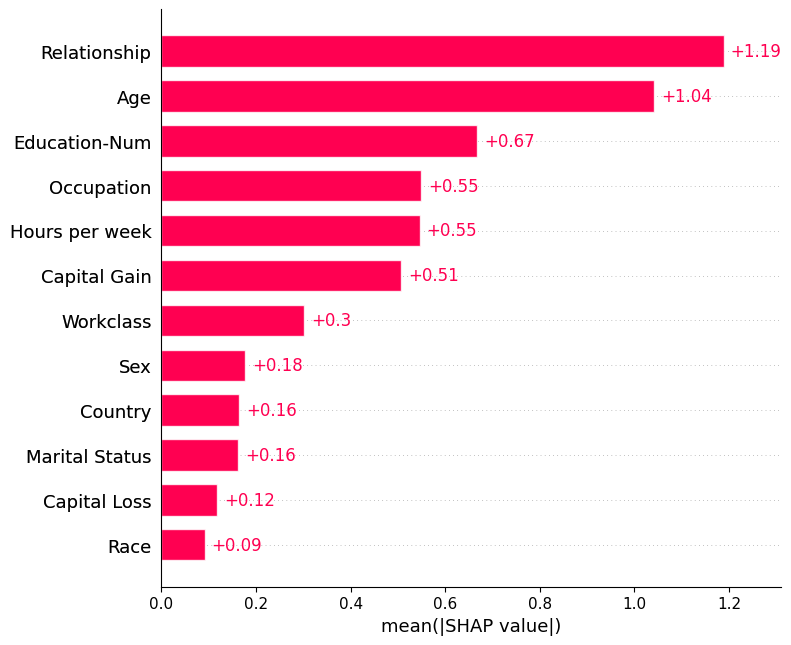

Wrong Prediction Number 74


In [3]:
import xgboost
import shap
# train XGBoost model
# train XGBoost model
X, y = shap.datasets.adult(n_points=2000)
model = xgboost.XGBClassifier().fit(X, y)


# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.plots.bar(shap_values,max_display=12)

y_binary = [1 if income == True else 0 for income in y]
predict = model.predict(X)
Wrong_pred = []
for i in range(len(predict)):
    if predict[i] != y_binary[i]:
        Wrong_pred.append(i)
print("Wrong Prediction Number",len(Wrong_pred))

In [4]:
# Create a DataFrame for easier manipulation
data = X.copy()
data['income'] = predict


# Find the mean or median values of features for high-income instances
high_income_data = data[data['income'] == 1]
print(len(high_income_data))
general_case_high_income = high_income_data.median()  # or use .median() for median values

print("General case for high income:")
print(general_case_high_income)

493
General case for high income:
Age               45.0
Workclass          4.0
Education-Num     13.0
Marital Status     2.0
Occupation         7.0
Relationship       4.0
Race               4.0
Sex                1.0
Capital Gain       0.0
Capital Loss       0.0
Hours per week    42.0
Country           39.0
income             1.0
dtype: float64


SHAP values for the general case of high income:


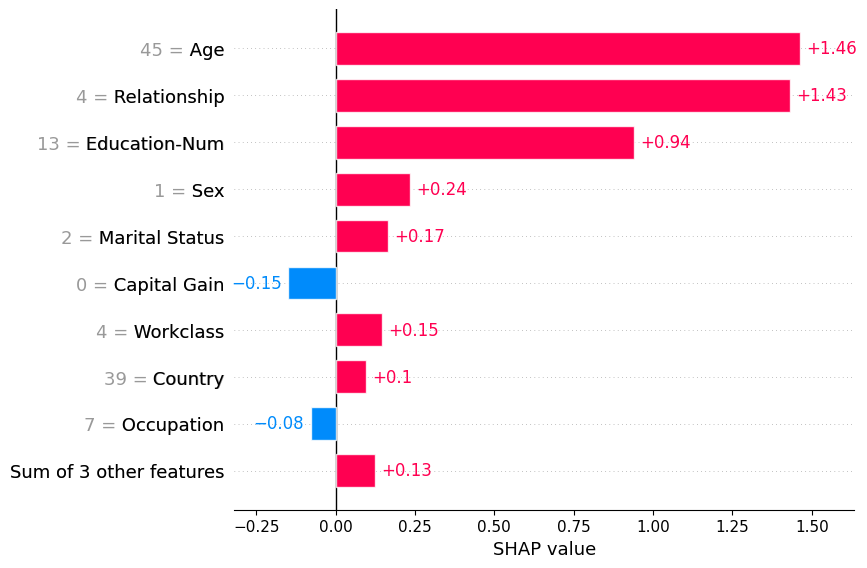

In [6]:
import pandas as pd
# Compute SHAP values for the general case
general_case_shap_values = explainer(pd.DataFrame([general_case_high_income.drop('income')]))

print("SHAP values for the general case of high income:")
shap.plots.bar(general_case_shap_values[0])

SHAP values for the current instance:


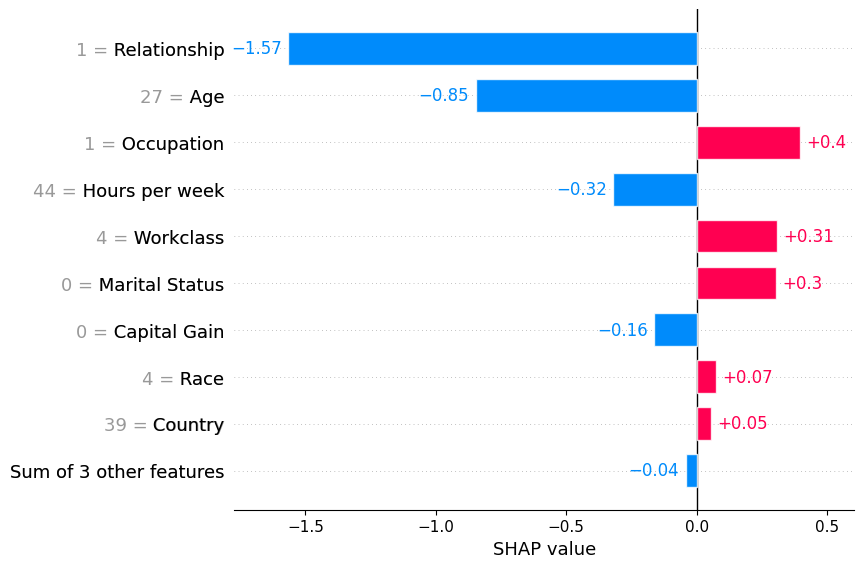

In [7]:
current_instance = X.iloc[0]  # Example: first instance
current_shap_values = shap_values[0]
print("SHAP values for the current instance:")
shap.plots.bar(current_shap_values)